In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
# Definir o número de pontos por classe
num_points = 100

# Gerar pontos aleatórios dentro do quadrado
x = np.random.uniform(low=-1, high=1, size=(num_points * 8,))
y = np.random.uniform(low=-1, high=1, size=(num_points * 8,))

In [4]:
# Definir as classes com base nas regiões de interseção
labels = []
for i in range(num_points * 8):
    if abs(x[i]) <= 1 and abs(y[i]) <= 1:
        if x[i] >= -1 and y[i] >= -1 and x[i] <= 1 and y[i] <= 1:
            if (x[i] >= -1 and x[i] <= 0) and (y[i] >= -1 and y[i] <= 0):
                labels.append(1)
            elif (x[i] >= 0 and x[i] <= 1) and (y[i] >= -1 and y[i] <= 0):
                labels.append(2)
            elif (x[i] >= -1 and x[i] <= 0) and (y[i] >= 0 and y[i] <= 1):
                labels.append(3)
            elif (x[i] >= 0 and x[i] <= 1) and (y[i] >= 0 and y[i] <= 1):
                labels.append(4)
        else:
            labels.append(0)
    else:
        labels.append(0)

In [5]:
# Converter as listas em arrays numpy
x = np.array(x)
y = np.array(y)
labels = np.array(labels)

In [6]:
# Dividir o conjunto de dados em treinamento, validação e teste
train_ratio = 0.6  # proporção de treinamento
val_ratio = 0.2  # proporção de validação
train_size = int(num_points * 8 * train_ratio)
val_size = int(num_points * 8 * val_ratio)

x_train = x[:train_size]
y_train = y[:train_size]
labels_train = labels[:train_size]

x_val = x[train_size:]
y_val = y[train_size:]
labels_val = labels[train_size:]

x_test = x[train_size+val_size:]
y_test = y[train_size+val_size:]
labels_test = labels[train_size+val_size:]

In [7]:
# Calcular a matriz de confusão para o conjunto de treinamento
confusion_matrix_train = confusion_matrix(labels_train, labels_train, labels=[0, 1, 2, 3, 4])

# Calcular a matriz de confusão para o conjunto de validação
confusion_matrix_val = confusion_matrix(labels_val, labels_val, labels=[0, 1, 2, 3, 4])

# Calcular a matriz de confusão para o conjunto de teste
confusion_matrix_test = confusion_matrix(labels_test, labels_test, labels=[0, 1, 2, 3, 4])

# Definir os rótulos das classes
class_labels = ['Não interseção', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4']

# Criar os DataFrames das matrizes de confusão para o conjunto de treinamento e validação
confusion_df_train = pd.DataFrame(confusion_matrix_train, index=class_labels, columns=class_labels)
confusion_df_val = pd.DataFrame(confusion_matrix_val, index=class_labels, columns=class_labels)
confusion_df_test = pd.DataFrame(confusion_matrix_test, index=class_labels, columns=class_labels)

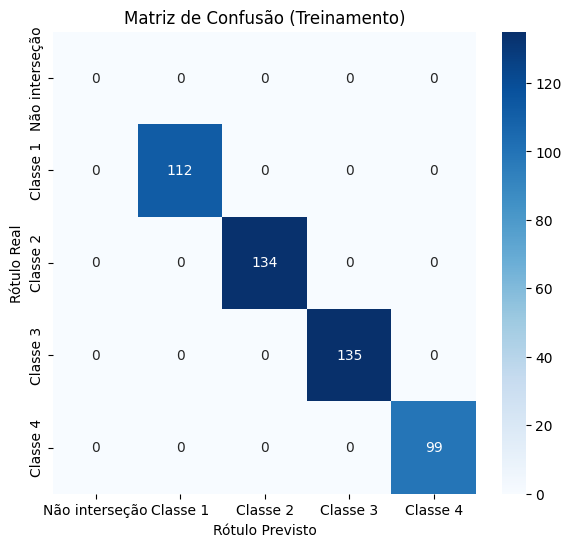

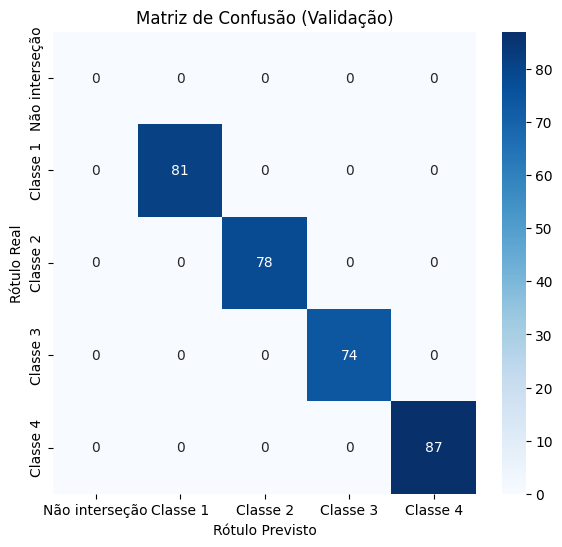

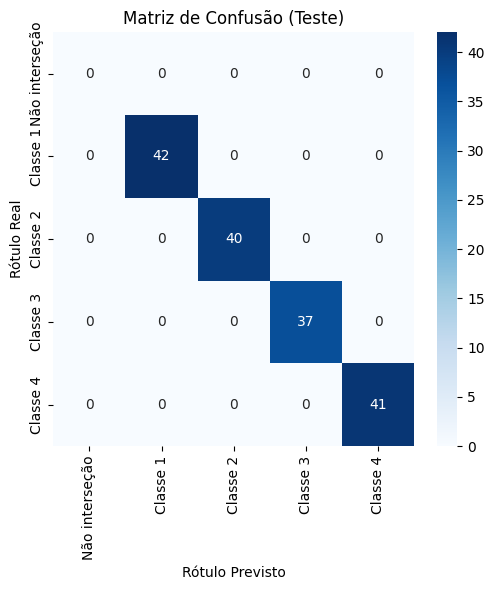

In [8]:
# Exibir as matrizes de confusão 
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_df_train, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão (Treinamento)')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Real')

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
sns.heatmap(confusion_df_val, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão (Validação)')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Real')

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 3)
sns.heatmap(confusion_df_test, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão (Teste)')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Real')

plt.tight_layout()
plt.show()
